C:\Users\rpiaz\AppData\Local\Temp\ipykernel_6208\1031040963.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model_type', y='mape', data=filtered_df, ax=axes[0], palette="Set2")
C:\Users\rpiaz\AppData\Local\Temp\ipykernel_6208\1031040963.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model_type', y='rmse', data=filtered_df, ax=axes[1], palette="Set2")


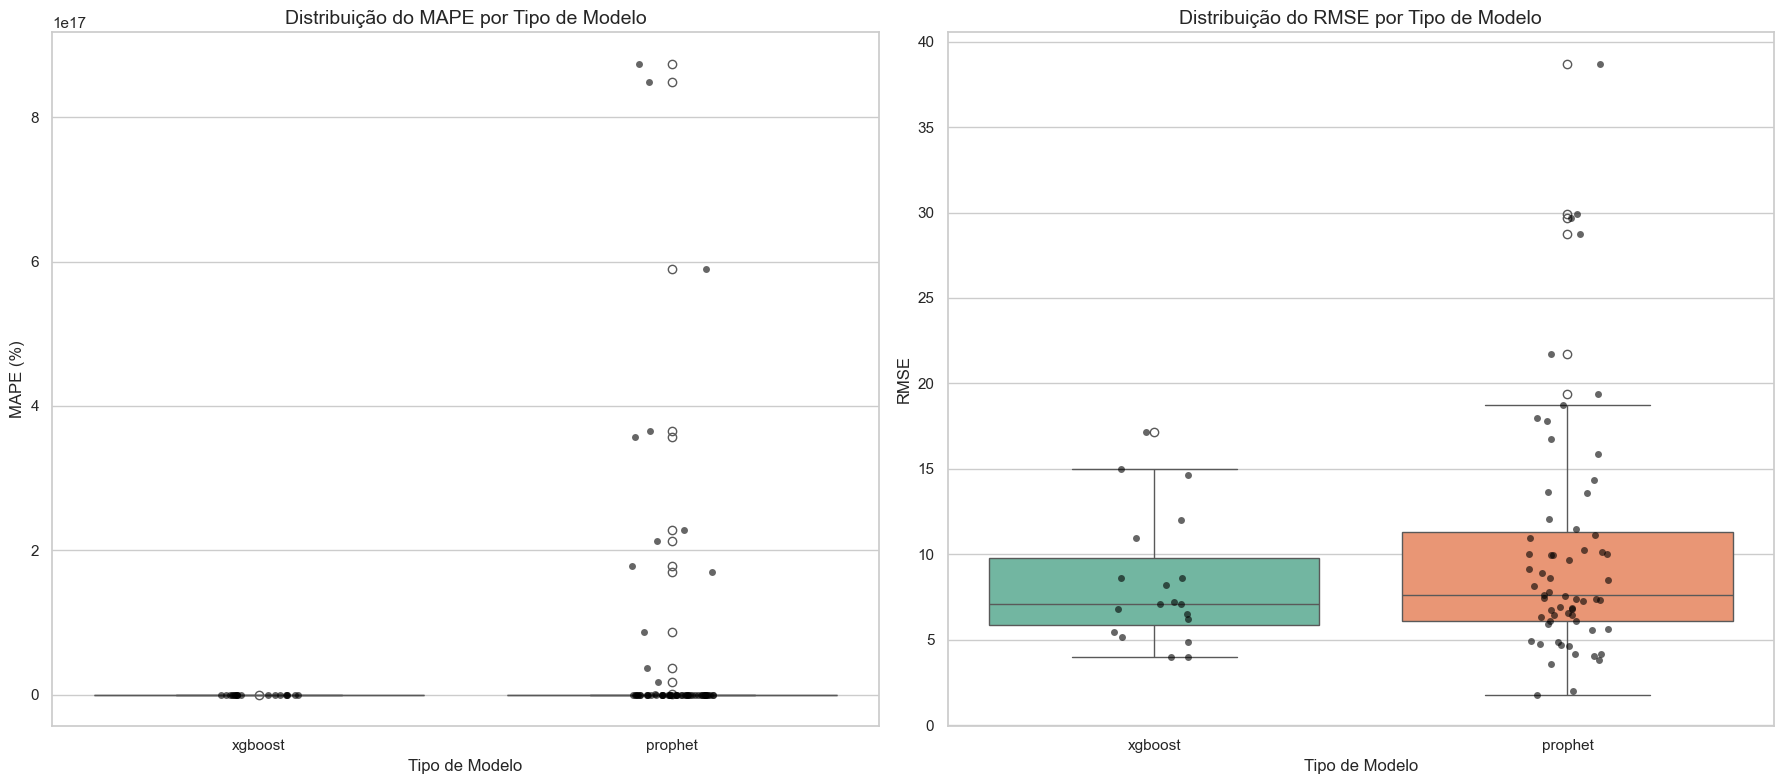

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo 'model_metrics.csv'
metrics_df = pd.read_csv("metrics/model_metrics.csv", on_bad_lines='skip')

# Converter colunas numéricas
numeric_columns = ['rmse', 'mse', 'mae', 'mape', 'r2', 'smape', 'mase']
for col in numeric_columns:
    metrics_df[col] = pd.to_numeric(metrics_df[col], errors='coerce')

# Remover linhas com valores NaN nas colunas numéricas
metrics_df = metrics_df.dropna(subset=numeric_columns)

# Filtrar valores extremos
mape_threshold = metrics_df['mape'].quantile(0.95)
rmse_threshold = metrics_df['rmse'].quantile(0.95)
filtered_df = metrics_df[(metrics_df['mape'] <= mape_threshold) & (metrics_df['rmse'] <= rmse_threshold)]

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar figura
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de MAPE
sns.boxplot(x='model_type', y='mape', data=filtered_df, ax=axes[0], palette="Set2")
sns.stripplot(x='model_type', y='mape', data=filtered_df, ax=axes[0], color='black', alpha=0.6, jitter=True)
axes[0].set_title("Distribuição do MAPE por Tipo de Modelo", fontsize=14)
axes[0].set_xlabel("Tipo de Modelo", fontsize=12)
axes[0].set_ylabel("MAPE (%)", fontsize=12)

# Gráfico de RMSE
sns.boxplot(x='model_type', y='rmse', data=filtered_df, ax=axes[1], palette="Set2")
sns.stripplot(x='model_type', y='rmse', data=filtered_df, ax=axes[1], color='black', alpha=0.6, jitter=True)
axes[1].set_title("Distribuição do RMSE por Tipo de Modelo", fontsize=14)
axes[1].set_xlabel("Tipo de Modelo", fontsize=12)
axes[1].set_ylabel("RMSE", fontsize=12)

# Ajustar layout
plt.tight_layout()

# Salvar o gráfico (opcional)
# plt.savefig('metricas_por_modelo.png', dpi=300)

plt.show()



C:\Users\rpiaz\AppData\Local\Temp\ipykernel_6208\615983358.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mape', y='item', data=product_mape_top, palette="viridis")


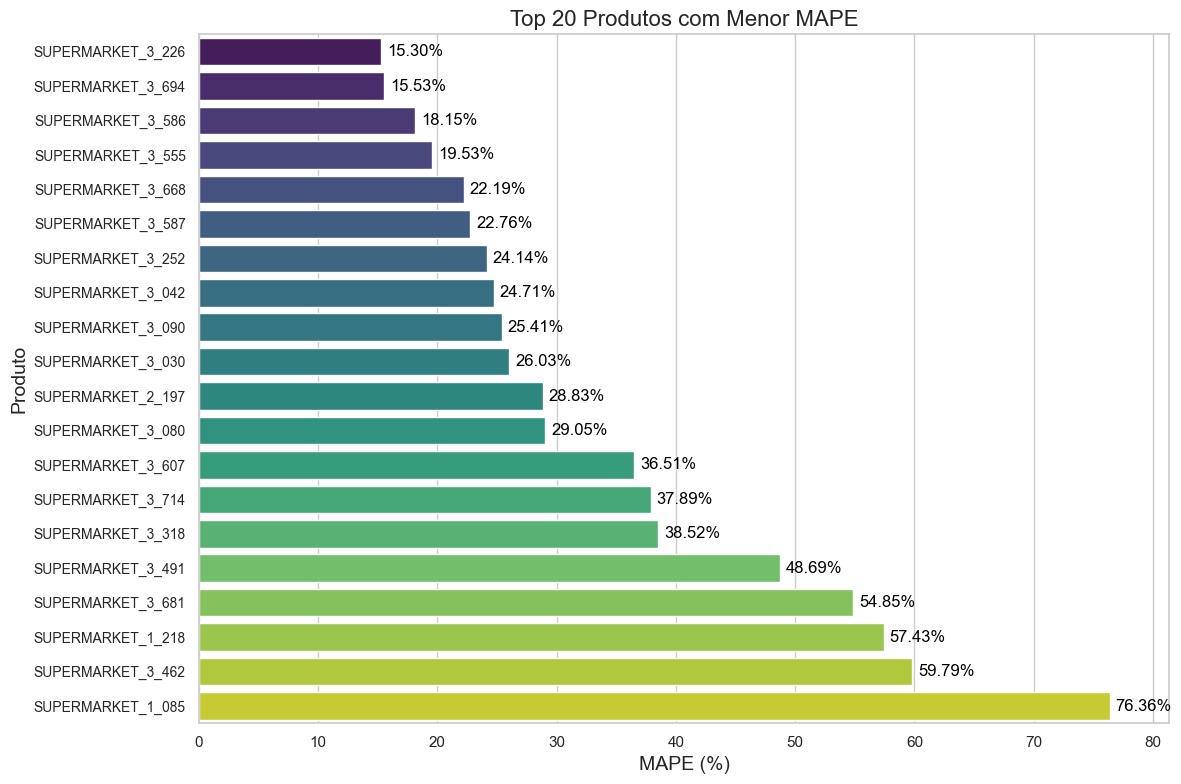

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [Código de carregamento e preparação dos dados permanece o mesmo]

# Criar o gráfico de barras com ajustes adicionais
plt.figure(figsize=(12, 8))
sns.barplot(x='mape', y='item', data=product_mape_top, palette="viridis")

# Adicionar títulos e rótulos
plt.title('Top 20 Produtos com Menor MAPE', fontsize=16)
plt.xlabel('MAPE (%)', fontsize=14)
plt.ylabel('Produto', fontsize=14)
plt.xlim(0, max(product_mape_top['mape']) + 5)  # Ajustar limite do eixo X

# Rotacionar os rótulos dos produtos se necessário
plt.yticks(fontsize=10)

# Adicionar valores nas barras
for index, value in enumerate(product_mape_top['mape']):
    plt.text(value + 0.5, index, f"{value:.2f}%", color='black', va="center")

# Ajustar o layout
plt.tight_layout()

# Salvar o gráfico (opcional)
# plt.savefig('top_20_produtos_menor_mape.png', dpi=300)

# Mostrar o gráfico
plt.show()